## Домашнее задание 3 (10 баллов)

## НИУ ВШЭ, 2020-21 учебный год

### О задании

В этом домашнем задании вы получите опыт подготовки данных и EDA (Exploratory Data Analysis), приблизившись к реальной работе с данными с помощью уже знакомых вам инструментов: numpy, pandas, matplotlib и seaborn.

Вы будет работать с задачей кредитного скоринга (оценка надёжности клиента). Предоставляются данные о 1000 клиентов, про которых известно около 20 признаков и положительная или отрицательная оценка в качестве кредитуемого. Эти данные нужно будет подготовить, исследовать (в том числе с помощью средств визуализации) и даже попробовать предложить какую-нибудь формулу для условной оценки надёжности клиентов исходя из предоставленных данных. Описание данных:
https://www.rdocumentation.org/packages/evtree/versions/1.0-8/topics/GermanCredit

Каждый построенный график необходимо красиво оформить - для этого требуется как минимум указать его название, а также отметить, что изображено по каждой из осей.
Также по каждому графику ожидается небольшой комментарий с выводами.

*Функции, которые могут пригодиться при оформлении графиков: `.show()`, `.title()`, `.xlabel()`, `.ylabel()`*

In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
from matplotlib import pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


### Задание 1 (0.0 балла)

Прочитайте средствами pandas файл с данными по ссылке https://raw.githubusercontent.com/PersDep/data-mining-intro-2021/main/hw03-EDA-data/german_credit.csv. Выведите базовое представление таблицы (первые 5 и последние 5 строк, размер).

In [ ]:
!pip install fsspec

     |████████████████████████████████| 102kB 5.5MB/s 


In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/PersDep/data-mining-intro-2021/main/hw03-EDA-data/german_credit.csv')

In [ ]:
data.head()

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,present_residence,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,no checking account,18,all credits at this bank paid back duly,car (used),1049,unknown/no savings account,< 1 yr,< 20,female : non-single or male : single,none,>= 7 yrs,car or other,21,none,for free,1,skilled employee/official,0 to 2,no,no,good
1,no checking account,9,all credits at this bank paid back duly,others,2799,unknown/no savings account,1 <= ... < 4 yrs,25 <= ... < 35,male : married/widowed,none,1 <= ... < 4 yrs,unknown / no property,36,none,for free,2-3,skilled employee/official,3 or more,no,no,good
2,... < 0 DM,12,no credits taken/all credits paid back duly,retraining,841,... < 100 DM,4 <= ... < 7 yrs,25 <= ... < 35,female : non-single or male : single,none,>= 7 yrs,unknown / no property,23,none,for free,1,unskilled - resident,0 to 2,no,no,good
3,no checking account,12,all credits at this bank paid back duly,others,2122,unknown/no savings account,1 <= ... < 4 yrs,20 <= ... < 25,male : married/widowed,none,1 <= ... < 4 yrs,unknown / no property,39,none,for free,2-3,unskilled - resident,3 or more,no,yes,good
4,no checking account,12,all credits at this bank paid back duly,others,2171,unknown/no savings account,1 <= ... < 4 yrs,< 20,male : married/widowed,none,>= 7 yrs,car or other,38,bank,rent,2-3,unskilled - resident,0 to 2,no,yes,good


### Задание 2 (0.5 балла)

Определите, есть ли пропуски в данных. Разделите признаки на количественные, бинарные, порядковые и категориальные.

In [ ]:
data.isnull().sum().sum()

0

Проанализировав, я разделил пул признаков следующим образом


*   Количественные: 
    duration, amount, age
*   Порядковые:
    status, savings, employement_duration, installment_rate, number credits, people_liable 
*   Категориальные:
    credit_histoey, purpose, personal_status_sex, other_debts, property, other_installment_plans, housing, job
*   Бинарные:
    telephone, foreign worker, credit_risk


    P.S. Делив признаки на группы, я придержживвался следующей логики
    Бинарные - в колонке стоят значения да/нет и тп
    Количественные - можно измерить, тип int
    Категориальные - когда есть типы категорий, их группы (дискретное мнодество)
    Порядковые - сравнимые между собой данные (0 кредитов, 1-2, 3-4 и тп) 
    





также для подготовки данных можно делить кодом

In [ ]:
interval_features = data.select_dtypes(include=['int64']).columns.tolist()

interval_features


['duration', 'amount', 'age']

Пропусков в даннх нет

### Задание 3 (0.5 балла)

Выведите среднюю сумму кредита (колонка amount) в каждой категории (колонка purpose), воспользовавшись методом groupby.

In [ ]:
data.groupby('purpose').mean()['amount']

purpose
business               8209.333333
car (new)              5370.223301
car (used)             3066.983425
domestic appliances    2728.090909
furniture/equipment    2487.685714
others                 3062.948718
radio/television       1498.000000
repairs                3180.400000
retraining             4158.041237
vacation               1205.888889
Name: amount, dtype: float64

### Задание 4 (0.5 балла)


Какой процент клиентов моложе 30 лет (колонка age) снимает жилье (колонка housing)? А какой процент клиентов старше 40 лет снимает жилье?

In [ ]:
ds = len(data[(data['age'] < 30) & (data['housing'] == 'rent')]) / len(data[data['age'] < 30])
ds

0.6666666666666666

In [ ]:
import math 
ds = len(data[(data['age'] < 30) & (data['housing'] == 'rent')]) / len(data[data['age'] < 30])
a = ds * 100
hw12 = '{} {}'.format(math.ceil(a), "процентов клиентов моложе 30 лет снимает жилье") # string formatting
print(hw12)

67 процентов клиентов моложе 30 лет снимает жилье


In [ ]:
dz = len(data[(data['age'] > 40) & (data['housing'] == 'rent')]) / len(data[data['age'] > 40])
b = dz * 100
hw13 = '{} {}'.format(math.ceil(b), "процентов клиентов старше 40 лет снимает жилье") # string formatting
print(hw13)

69 процентов клиентов старше 40 лет снимает жилье


### Задание 5 (0.5 балла)

 У скольких иностранцев (foreign_worker) число кредитов (number_credits) больше 3?

In [ ]:
foreign = len(data[(data['number_credits'] != "1") & (data['foreign_worker'] == 'yes') & (data['number_credits'] != "2-3")]) 
hw14 = '{} {} {}'.format("У", foreign, "иностранца больше трёх кредитов") # string formatting
print(hw14)

У 1 иностранца больше трёх кредитов


### Задание 6 (1 балл)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Используя numpy и matplotlib, начнём с тренировки: постройте график функций $sin(x)$ и $cos(x)$ от $-\pi$ до $\pi$ из 100 точек c легендой и сеткой. Используйте для линий разные цвета, одна из них пусть будет пунктирной. Результат в этом и следующих заданиях на построение графиков должен получиться примерно как на картинке. Содержание подписей не должно обязательно совпадать, однако осмысленные подписи должны присутствовать на графиках.

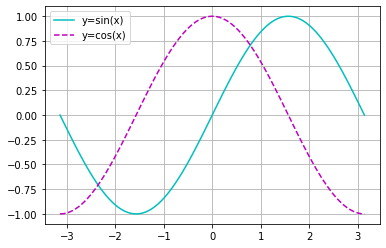

In [ ]:
# your code here

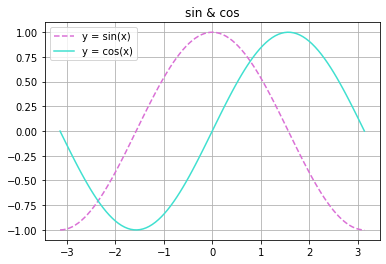

In [ ]:
x = np.linspace( -1*np.pi, np.pi, 100)
y1 = np.cos(x)
y2 = np.sin(x)
plt.title('sin & cos')
plt.grid()
_ = plt.plot(x, y1, linestyle = '--', label = 'y = sin(x)', color = 'Orchid')
_ = plt.plot(x, y2, label = 'y = cos(x)', color = 'Turquoise')
plt.legend() 

### Задание 7 (1 балл)

Рассмотрим сравнительное количество положительных и отрицательных кейсов в зависимости от размера текущего счёта. Постройте зеркальные горизонтальные гистограммы.

In [ ]:
df4.shape

(4,)

In [ ]:
df4

no checking account                           135
... < 0 DM                                    105
... >= 200 DM / salary for at least 1 year     46
0<= ... < 200 DM                               14
Name: status, dtype: int64

In [ ]:
df2

... >= 200 DM / salary for at least 1 year    348
... < 0 DM                                    164
no checking account                           139
0<= ... < 200 DM                               49
Name: status, dtype: int64

(365.4, 0.0)

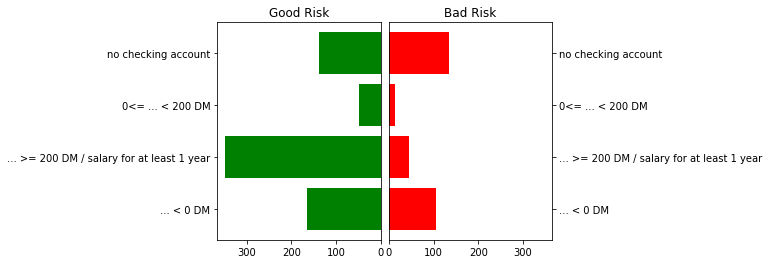

In [ ]:
#берем срезданных с условием кредитного риска (good и bad)
df1 = data.loc[data['credit_risk']=='good']
df3 = data.loc[data['credit_risk']=='bad']

#подсчитываем значения status по вырезанному ранее условию и уходим от ошибки c shape. Методом value_counts подсчитываем значения в столбце status
#с помощью sort_index не даём первому сттолбцу значений разбросаться в порядке сортировки изначального value_counts

df2 = df1['status'].value_counts().sort_index()
df4 = df3['status'].value_counts().sort_index()

fig, ax = plt.subplots(1,2)
#делаем графики горизонтальными и добавляем цвета
ax[0].barh(df2.index, df2.values, color='green')
ax[1].barh(df4.index, df4.values, color='red')

plt.subplots_adjust(wspace=0.05) #добавляем дистанцию между категорями в графике
ax[1].yaxis.tick_right()
ax[1].set_xlim(ax[0].get_xlim())
ax[1].title.set_text('Bad Risk')
ax[0].title.set_text('Good Risk')
ax[0].set_xlim(ax[0].get_xlim()[::-1]) #разворачиваем левый график, делаем его зеркальным правому

хочу выразить свою благодарность Гуглу, а именно следующим стаьям, поддерживающим меня на всем пути построения этого графика 
https://fooobar.com/questions/13686553/changing-sort-in-valuecounts
https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.axes.Axes.barh.html
https://stackoverflow.com/questions/38799469/flip-left-right-plotly-horizontal-histogram

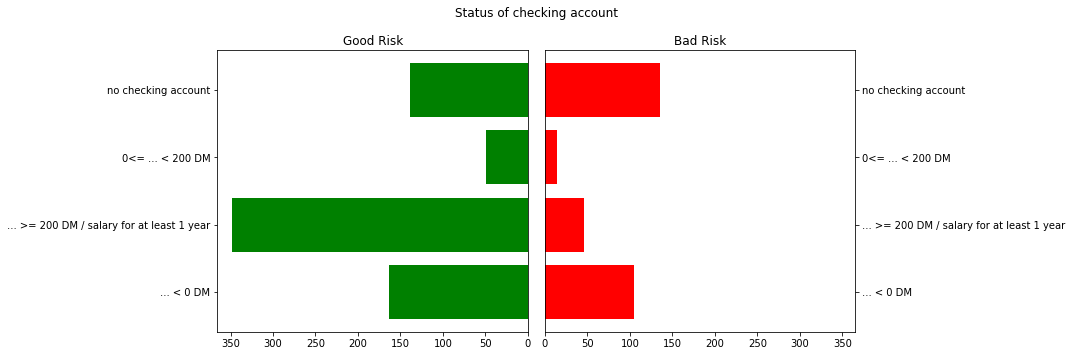

In [ ]:
# your code here

### Задание 8  (0.5 балла)

In [ ]:
import seaborn as sns

Теперь постройте гистограмму для сравнения количества положительных и отрицательных кейсов в зависимости от размера сберегательного счёта с помощью seaborn. Какой способ вам больше нравится с точки зрения трудоёмкости написания кода? А с точки зрения восприятия результата?

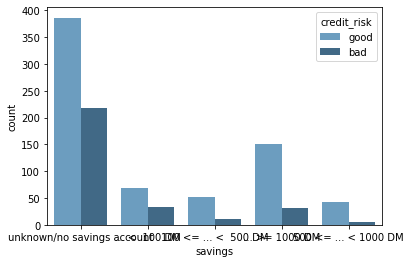

In [ ]:
ax = sns.countplot(x="savings", hue="credit_risk", data=data, palette="Blues_d", width)


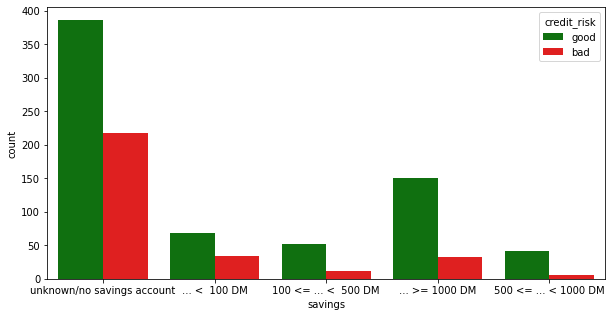

In [ ]:
# your code here

### Задание 9  (1 балл)

seaborn легко позволяет добавить ещё больше информации на один график. Для каждого размера сберегательного счёта мы можем оценить не только количество положительных и отрицательных кейсов, но и их распределение по возрасту, например. Постройте подходящую для этого визуализацию.

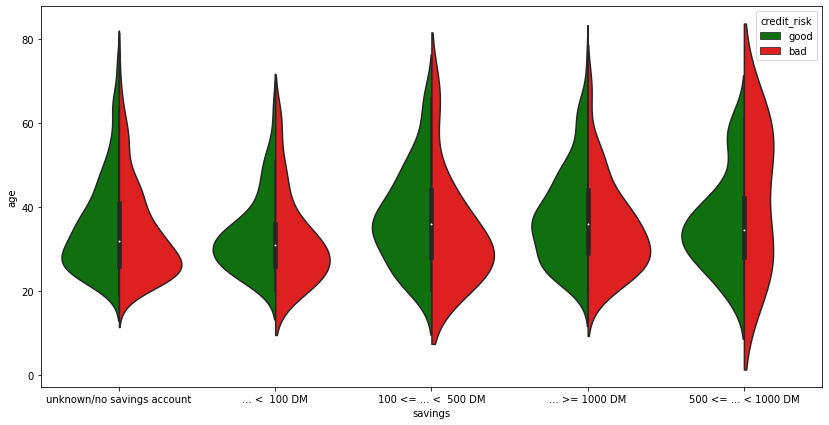

In [ ]:
# your code here

In [ ]:
%matplotlib inline

<Figure size 720x1008 with 0 Axes>

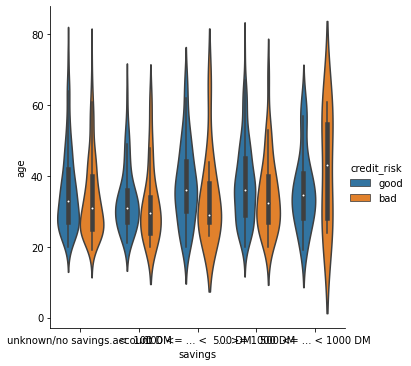

<Figure size 720x1008 with 0 Axes>

In [ ]:
sns.catplot(x="savings", y="age", hue = 'credit_risk', data = data, kind="violin", figsize=(40, 45))
plt.figure(figsize=(10, 14))

### Задание 10  (0.5 балла)

Заканчивая с гистограммами, посмотрим на распределение положительных и отрицательных кейсов по возрастам, разместив их друг над другом. Добавим распределение всех взятых кредитов.

In [ ]:
data.credit_risk.unique()

array(['good', 'bad'], dtype=object)

In [ ]:
ds=data['age'].vaue_counts().set_index()

AttributeError: ignored

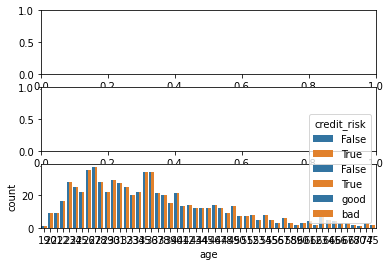

In [ ]:
fig, ax = plt.subplots(3, 1)
ax[0] = sns.countplot(x=data['age'], hue=data.credit_risk=='good')
ax[1] = sns.countplot(x=data['age'], hue=data.credit_risk=='bad')
ax[2] = sns.countplot(x=data['age'], hue=data['credit_risk'])
plt.show()



In [ ]:
df6 

19     1
20     5
21     5
22    11
23    20
24    20
25    18
26    14
27    13
28    15
29    15
30    11
31    11
32     9
33    13
34    11
35     6
36     6
37     8
38     4
39     6
40     6
41     4
42     8
43     5
44     5
45     3
46     4
47     5
48     3
49     1
50     3
51     1
52     1
53     5
54     2
55     3
57     3
58     2
59     1
60     3
61     3
63     1
65     1
66     2
68     2
74     1
Name: age, dtype: int64

In [ ]:
df7.isnull()

19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
30    False
31    False
32    False
33    False
34    False
35    False
36    False
37    False
38    False
39    False
40    False
41    False
42    False
43    False
44    False
45    False
46    False
47    False
48    False
49    False
50    False
51    False
52    False
53    False
54    False
55    False
56     True
57    False
58    False
59    False
60    False
61    False
62     True
63    False
64     True
65    False
66    False
67     True
68    False
70     True
74    False
75     True
Name: age, dtype: bool

<BarContainer object of 100 artists>

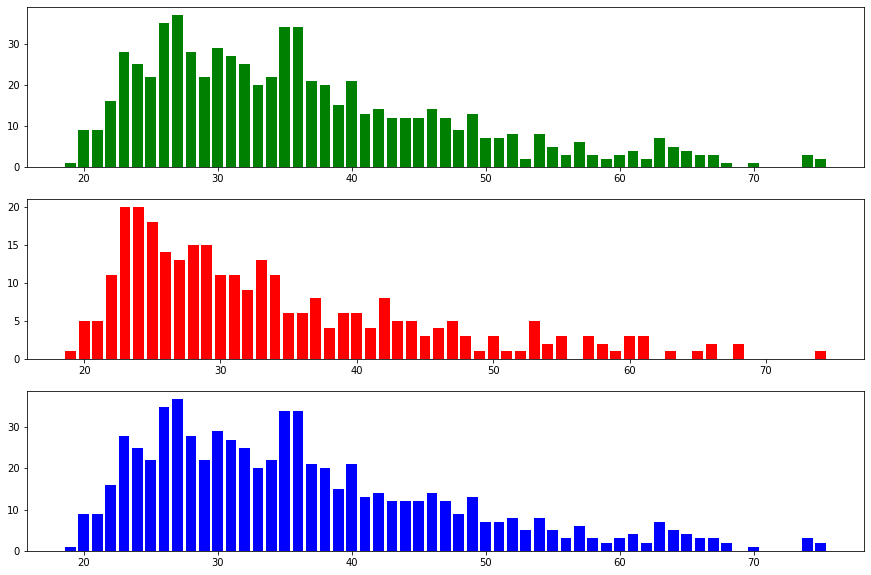

In [ ]:
#берем срезданных с условием кредитного риска (good и bad)
df1 = data.loc[data['credit_risk']=='good']
df3 = data.loc[data['credit_risk']=='bad']


df5 = df1['age'].value_counts().sort_index() 
df6 = df3['age'].value_counts().sort_index()

df7 = pd.concat([df5, df6]) #складываем два пандас сериас, чтобы на 3 графике не обнулялись значения, которые есть на первом, но нет на втором (и наоборот)

fig, ax = plt.subplots(3,1, figsize=(15, 10))
#делаем графики горизонтальными, передаем возраст на ось х, передаем колиество по credit_risk в у и добавляем цвета
ax[0].bar(df5.index, df5.values, color='green')
ax[1].bar(df6.index, df6.values, color='red')
ax[2].bar(df7.index, df7.values, color='blue')


при построении данного графика ни один питонист не пострадал.
Наши герои статьи, помогавшие мне строить сие чудо:
*   https://stackoverflow.com/questions/332289/how-do-you-change-the-size-of-figures-drawn-with-matplotlib
*   https://stackoverflow.com/questions/42514444/how-do-you-merge-2-series-in-pandas

и другие, участвовавшие в первом пизоде (задании 7) 


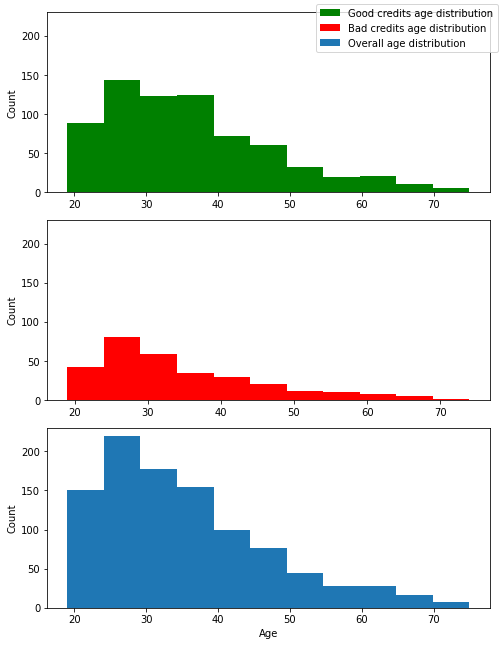

### Задание 11  (0.5 балла)

Не менее полезной иногда может быть диаграмма рассеяния. Постройте такую диаграмму с продолжительностью и размерами кредитов в качестве осей. Обозначьте положительные и отрицательные кейсы разными цветами.

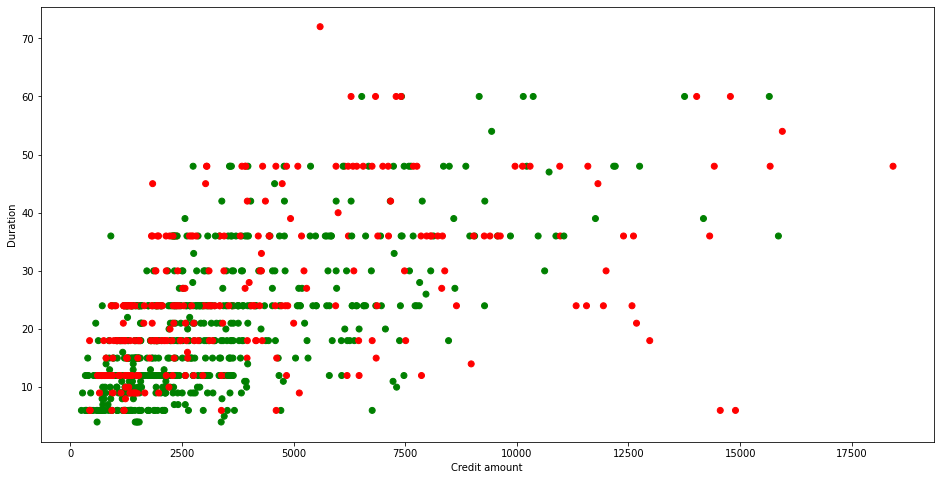

In [ ]:
# your code here

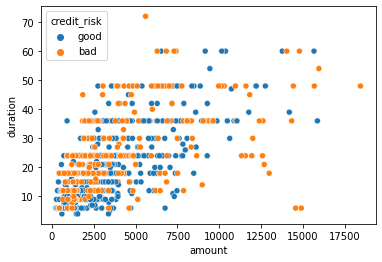

In [ ]:
sns.scatterplot(data = data, x = 'amount',y = 'duration', hue = 'credit_risk')


### Задание 12  (1 балл)

Продвинемся глубже. Постройте 3D версию диаграммы рассеяния, добавив ось с возрастом.

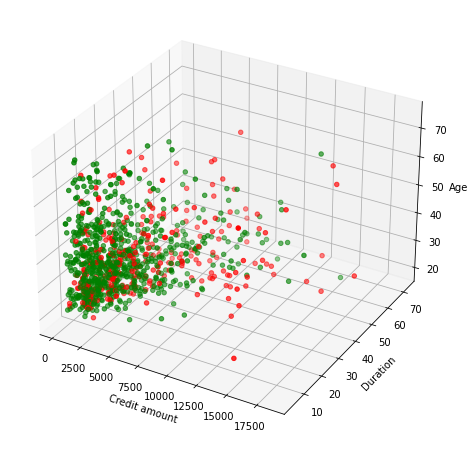

In [ ]:
# your code here

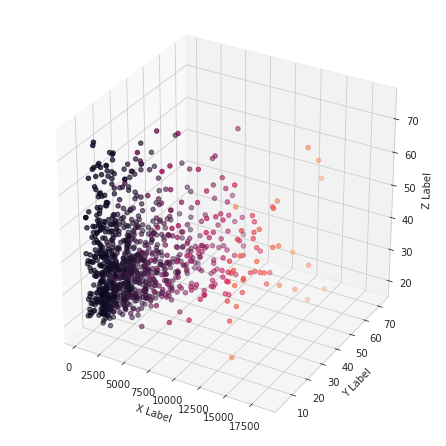

In [ ]:
import re, seaborn as sns, numpy as np, pandas as pd, random
from pylab import *
from matplotlib.pyplot import plot, show, draw, figure, cm
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
sns.set_style("whitegrid", {'axes.grid' : False})

fig = plt.figure(figsize=(6,6))

ax = Axes3D(fig) # Method 1
# ax = fig.add_subplot(111, projection='3d') # Method 2

x = data['amount']
y = data['duration']
z = data['age']
m = data['credit_risk']

ax.scatter(x, y, z, c=x, marker='o')
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

### Задание 13  (0.5 балла)

Представьте все порядковые и бинарные признаки в виде числовых значений {0, ..., n - 1}, где n это количество значений признака. Избавьтесь от категориальных признаков.

In [ ]:
df = data.copy()

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [ ]:
obj_cols = df.select_dtypes(include=[object])

for i in obj_cols:
    df[i+'label'] = le.fit_transform(df[i])

In [ ]:
df.head()

,duration,amount,age,telephone,foreign_worker,credit_risk,statuslabel,credit_historylabel,purposelabel,savingslabel,employment_durationlabel,installment_ratelabel,personal_status_sexlabel,other_debtorslabel,present_residencelabel,propertylabel,other_installment_planslabel,housinglabel,number_creditslabel,joblabel,people_liablelabel
0,18,1049,21,0,0,1,3,0,2,4,2,2,0,2,3,1,1,0,0,1,0
1,9,2799,36,0,0,1,3,0,5,4,0,1,3,2,0,3,1,0,1,1,1
2,12,841,23,0,0,1,0,4,8,0,1,1,0,2,3,3,1,0,0,3,0
3,12,2122,39,0,1,1,3,0,5,4,0,0,3,2,0,3,1,0,1,3,1
4,12,2171,38,0,1,1,3,0,5,4,0,2,3,2,3,1,0,2,1,3,0


In [ ]:
df.drop(['status', 'credit_history', 'purpose', 'savings', 'employment_duration', 'installment_rate', 'personal_status_sex', 'other_debtors', 'present_residence', 'property', 'other_installment_plans', 'housing', 'number_credits', 'job', 'people_liable'], axis = 1, inplace=True)

Уверен, что удалить старые колонки с типом object можно было бы куда умнее, например, испольовав срез или iloc, но я не нашел способа обойти нужные колонки, которые попадались без закономерности на пути тех, что надо было выкинуть, поэтому втупую перечислил 

Также есть еще один способ кодирования, но он более муторный


In [ ]:
#dict_tel = {'no':0, 'yes (under customer name)':1}
#df.telephone = df.telephone.map(dict_tel)

In [ ]:
#dict_foreign = {'no':0, 'yes':1}
#df.foreign_worker = df.foreign_worker.map(dict_foreign)

#dict_risk = {'bad':0, 'good':1}
#df.credit_risk = df.credit_risk.map(dict_risk)

### Задание 14  (2 балла)

По результатам предыдущего задания у вас должна получиться таблица, в которой все признаки так или иначе представлены числовыми значениями. Попробуйте придумать на основе проведённых исследований данных какую-нибудь формулу, связывающую целевую переменную с признаками, не используя готовых инструментов машинного обучения. По желанию вы можете исключить ещё какие-то признаки, или, наоборот, сформировать новые на основе имеющихся. Возможно, вы захотите отмасштабировать большие наборы численных значений некоторых признаков с помощью интервалов. Цель: реализовать функцию, которая будет принимать на вход набор признаков для объекта выборки и возвращать прогноз целевой переменной (0 или 1). Например, вы можете просто сложить все признаки и возращать ноль, если сумма отрицательная, а в противном случае единицу. Но наверняка можно придумать лучше!
Данные уже разделены на набор для обучения, который вы можете использовать как угодно, и тестовый, на котором нужно будет проверить вашу точность. Постарайтесь достичь точности хотя бы 0.6.

In [ ]:
def predict(Xtest: np.array) -> np.array:
    # your code here

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X = data.drop('credit_risk', 1).values
y = data['credit_risk'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10)
# Используйте X_train и y_train на ваше усмотрение
# your code here
accuracy_score(y_test, predict(X_test))